In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import scikit_posthocs as sp # https://pypi.org/project/scikit-posthocs/
import stac
import matplotlib.pyplot as plt

# Read in our data for comparing

In [159]:
# Assumes a formattting where rows are datasets, and the methods are columns
df = pd.read_excel("data/comparison_result_autocdrp.xlsx",engine="openpyxl",header=0,index_col=0)
# df = pd.read_csv("data/rankings.csv",header=0,index_col=0)
# df=df.drop(columns="AutoCDRP")
data = np.asarray(df)

print("Read data")

# To be safe, ensure this matches what was expected
num_datasets, num_methods = data.shape
print("Methods:", num_methods, "Datasets:", num_datasets)


Read data
Methods: 8 Datasets: 6


conda at## Friedman testing
Non parametric test to check if there is a difference in means between the groups (classifiers)

In [160]:
alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

print(f"The friendman's chi-square value is {stat} and p-value={p}")
reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

The friendman's chi-square value is 39.0 and p-value=2.3748365461376314e-07
Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


### Post Hoc Analysis
See [Statistical Comparisons of Classifiers over Multiple Data Sets](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.141.3142&rep=rep1&type=pdf) for more detail

In [161]:
# At this point, we should only continue if H0 was rejected
if not reject:
    raise Exception("Exiting early. The rankings are only relevant if there was a difference in the means i.e. if we rejected h0 above")

In [162]:
# Helper functions for performing the statistical tests
def generate_scores(method, method_args, data, labels):
    pairwise_scores = method(data, **method_args) # Matrix for all pairwise comaprisons
    pairwise_scores=pairwise_scores.set_axis(labels, axis='columns') # Label the cols
    pairwise_scores=pairwise_scores.set_axis(labels, axis='rows') # Label the rows, note: same label as pairwise combinations
    return pairwise_scores

def plot(scores):
    # Pretty plot of significance
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True,'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

    sp.sign_plot(scores, **heatmap_args)

#### Nemenyi Test
Note: This is relevant when you would like to compare various methods.
For example if you propose several methods and want to compare them all against each
other, or to do an exhaustive comparison against several method. Often this is not
what we want, as we propose only one method (instead see Bonferoni below), and this would
be overconservativew. 

In [163]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, list(df.columns))

In [164]:
list(df.columns)

['tCNNS',
 'GCN',
 'ARMA',
 'ChebNet',
 'GraphDRP',
 'GraOmicDRP',
 'GraTransDRP',
 'AutoCDRP']

In [165]:
# Shows the p values for each pair
nemenyi_scores

,tCNNS,GCN,ARMA,ChebNet,GraphDRP,GraOmicDRP,GraTransDRP,AutoCDRP
tCNNS,1.000000,0.480613,0.833943,0.693026,0.102710,0.900000,0.233425,0.001000
GCN,0.480613,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,0.206098
ARMA,0.833943,0.900000,1.000000,0.900000,0.869172,0.900000,0.900000,0.045361
ChebNet,0.693026,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.087746
GraphDRP,0.102710,0.900000,0.869172,0.900000,1.000000,0.798715,0.900000,0.657795
GraOmicDRP,0.900000,0.900000,0.900000,0.900000,0.798715,1.000000,0.900000,0.031658
GraTransDRP,0.233425,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.442264
AutoCDRP,0.001000,0.206098,0.045361,0.087746,0.657795,0.031658,0.442264,1.000000


In [166]:
is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r

SyntaxError: invalid syntax (3724833414.py, line 1)

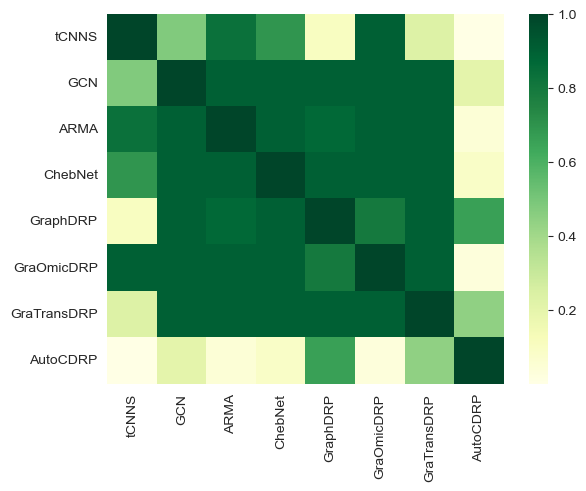

In [181]:
import seaborn as sns
fig=sns.heatmap(nemenyi_scores,annot=False,cmap="YlGn")
fig.figure.savefig("output.pdf",dpi=300,format="pdf", bbox_inches="tight")


#### Bonferoni-Holm Correction
In some cases, we do not care about all pairwise comparisons as we only propose a single method.
In this case we can prefer using the Bonferroni correction with a a control method, where the 
control is our proposed method.  This is confirmed in Statistical Comparisons of Classifiers over Multiple Data Sets with

"We thus should not make pairwise comparisons when we in fact only test whether a newly proposed method is better than the existing ones."

This is done with the "Holm" method here


**NOTE:** This relies on the method being called "*Proposed Method*" in the imported CSV file,
for lack of a generic way to set the control group.

In [168]:
# This library requires the data in different format to above, so was tranposed
statistic, p_value, ranking, rank_cmp  = stac.friedman_test(*np.transpose(data))
ranks = {key: rank_cmp[i] for i, key in enumerate(list(df.columns))} 

comparisons, z_values, p_values, adj_p_values = stac.holm_test(ranks, control="AutoCDRP")
print(p_values)
adj_p_values = np.asarray(adj_p_values)


[7.522468307596952e-06, 0.0014627165866811787, 0.002183044737362305, 0.004677734981047177, 0.013328328780817467, 0.03917016602998391, 0.08748033392519727]


In [169]:
print(comparisons)
print( z_values)
print(p_values)
print(adj_p_values)

['AutoCDRP vs tCNNS', 'AutoCDRP vs GraOmicDRP', 'AutoCDRP vs ARMA', 'AutoCDRP vs ChebNet', 'AutoCDRP vs GCN', 'AutoCDRP vs GraTransDRP', 'AutoCDRP vs GraphDRP']
[4.4783429475148, 3.1819805153394634, 3.0641293851417055, 2.82842712474619, 2.474873734152916, 2.0623947784607637, 1.7088413878674897]
[7.522468307596952e-06, 0.0014627165866811787, 0.002183044737362305, 0.004677734981047177, 0.013328328780817467, 0.03917016602998391, 0.08748033392519727]
[5.26572782e-05 8.77629952e-03 1.09152237e-02 1.87109399e-02
 3.99849863e-02 7.83403321e-02 8.74803339e-02]


In [170]:
# Rankings
for method, rank in ranks.items():
    print(method +":", "%.2f" % rank)

tCNNS: 1.18
GCN: 3.18
ARMA: 2.59
ChebNet: 2.83
GraphDRP: 3.95
GraOmicDRP: 2.47
GraTransDRP: 3.59
AutoCDRP: 5.66


In [171]:
holm_scores = pd.DataFrame({"p": adj_p_values, "sig": adj_p_values < 0.1}, index=comparisons)

In [172]:
holm_scores

,p,sig
AutoCDRP vs tCNNS,0.000053,True
AutoCDRP vs GraOmicDRP,0.008776,True
AutoCDRP vs ARMA,0.010915,True
AutoCDRP vs ChebNet,0.018711,True
AutoCDRP vs GCN,0.039985,True
AutoCDRP vs GraTransDRP,0.078340,True
AutoCDRP vs GraphDRP,0.087480,True


In [173]:
import seaborn as sns
fig=sns.heatmap(stac.holm_test(ranks, control="AutoCDRP"),annot=True,cmap="crest")
fig.figure.savefig("output.pdf")

ValueError: could not convert string to float: 'AutoCDRP vs tCNNS'